In [1]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import style
from struct import unpack
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('fast')

---
---
---
---
---
# Behaviour
---
---
---
---
---
---


In [2]:
# Open CSV file and extract raw data (and fix wrong entries)
file_name = '/Users/torstensola/Fundrive/sean/sean_201903311147.csv'
with open(file_name) as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    data = []
    datum = []
    for row in readCSV:
        if len(row) > 0:
            if row[0] == '':
                datum.append(''.join(row[1:]))
            else:
                datum = row
            data.append(datum)
            

In [3]:
# Generate a DataFrame
md = pd.DataFrame({
    'Trial': {'Value': [], 'TS_PC': []},
    'Sniff': {'TS_A': [], 'TS_PC': []},
    'Odor': {'Value': [], 'TS_PC': []},
    'Position': {'Value':[], 'TS_PC': []},
    'Reward': {'trigTS_PC': [], 'TS_A': [], 'TS_PC': [], 'offTS_A': [], 'offTS_PC': []},
    'Licks': {'Value': [], 'TS_A': [], 'TS_PC': []},
})

In [4]:
# Fill with data
session = 1
for datum in data:
    t = [float(x) for x in datum[1:]]
    if datum[0] == 'x':
        md.Sniff.TS_A.append(t[0])
        md.Sniff.TS_PC.append(t[1])
    elif datum[0] == 'M':
        md.Position.Value.append(-t[0])
        md.Position.TS_PC.append(t[1])
    elif datum[0] == 'R':
        md.Reward.trigTS_PC.append(t)
    elif datum[0] == 'r':
        md.Reward.TS_A.append(t[0])
        md.Reward.TS_PC.append(t[1])
    elif datum[0] == 'p':
        md.Reward.offTS_A.append(t[0])
        md.Reward.offTS_PC.append(t[1])
    elif datum[0] == 'l':
        md.Licks.Value.append(t[0])
        md.Licks.TS_A.append(t[1])
        md.Licks.TS_PC.append(t[2])
    elif datum[0] == 'T':
        md.Trial.Value.append(t[0])
        md.Trial.TS_PC.append(t[1])
    elif datum[0] == 'O':
        md.Odor.Value.append(t[0])
        md.Odor.TS_PC.append(t[1])

# Find all lick indices for position
md.Licks['posIDX'] = []
n = 0
for value in md.Licks.TS_PC:
    do = 1
    while do:
        if value-md.Position.TS_PC[n] < 0:
            do = 0
            md.Licks.posIDX.append(n)
        else:
            n += 1
            
md.Reward['posIDX'] = []
n = 0
for value in md.Reward.TS_PC:
    do = 1
    while do:
        if value-md.Position.TS_PC[n] < 0:
            do = 0
            md.Reward.posIDX.append(n)
        else:
            n += 1
            
md.Odor['posIDX'] = []
n = 0
for value in md.Odor.TS_PC:
    do = 1
    while do:
        if value-md.Position.TS_PC[n] < 0:
            do = 0
            md.Odor.posIDX.append(n)
        else:
            n += 1

In [5]:
x_n = []
x_ni = []
for i in range(len(md.Sniff.TS_A)-1):
    if md.Sniff.TS_A[i+1]-md.Sniff.TS_A[i] != 0:
        x_n.append(md.Sniff.TS_PC[i])
        x_ni.append(i)
x_n.append(md.Sniff.TS_PC[-1])
x_ni.append(len(md.Sniff.TS_PC))

In [6]:
# Find a position event for each trigger event
#s = [i for i, x in enumerate(np.diff(md.Sniff.TS_PC) < -10) if x]
md.Sniff['trigIDX'] = []
n = 0
for i in x_ni:
    do = 1
    while (do) and (i < len(md.Sniff.TS_PC)):
        if md.Sniff.TS_PC[i]-md.Position.TS_PC[n] < 0:
            do = 0
            md.Sniff.trigIDX.append(n)
        else:
            n += 1

In [7]:
# Get speed and filter for each position time stamp
velT = 1
hm = np.diff(md.Position.Value)
hmm = np.diff(md.Position.TS_PC)
md.Position['Velocity'] = []
md.Position['VelFilt'] = []
for n,value in enumerate(hm):
    md.Position.Velocity.append(value/hmm[n]/160)
    if value/hmm[n]/160 > velT:
        md.Position.VelFilt.append(n)
        
print('Portion of data above speed threshold: ', len(md.Position.VelFilt)/len(md.Position.Velocity))


Portion of data above speed threshold:  0.6707783568023062


In [8]:
licksPos = []
licksIDX = []
for value in md.Licks.posIDX:
    licksPos.append(md.Position.Value[value])
    licksIDX.append(md.Position.TS_PC[value])

rewPos = []
rewIDX = []
for value in md.Reward.posIDX:
    rewPos.append(md.Position.Value[value])
    rewIDX.append(md.Position.TS_PC[value])

odorPos = []
odorIDX = []
for value in md.Odor.posIDX:
    odorPos.append(md.Position.Value[value])
    odorIDX.append(md.Position.TS_PC[value])    

In [9]:
#test = np.diff(ts)
#bins = np.arange(0.001,.6,.01)
#x = test[test < .6]
#logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
#plt.subplot(212)
#plt.hist(x, bins=logbins)
#plt.xscale('log')
#plt.show()

---
---
---
---
---
# SPIKES
---
---
---
---
---
---


In [279]:
with open('/Users/torstensola/Documents/MATLAB/ts.csv') as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    ts = []
    for row in readCSV:
        if row[0] != 'NaN':
            ts.append(float(row[0]))
plt.rcParams["figure.figsize"] = 8,6


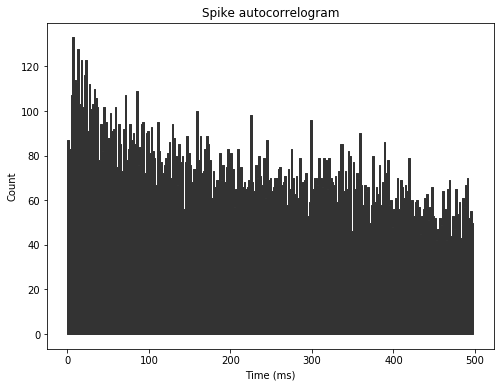

In [280]:
# Actual spike autocorrelogram
ts_bins = [int((x-min(ts))*500+1) for x in ts]

l = 250
ts_hist = np.zeros([l,1])
for i,j in enumerate(ts_bins):
    do = True
    n = i
    while (do) and (n < len(ts_bins)-1):
        n += 1
        tmp = ts_bins[n]
        if tmp-j > (l-1):
            do = False
            break
        else:
            ts_hist[tmp-j] += 1
ts_hist.shape = (250)
#plt.step(np.arange(0,l*2,2),ts_hist,'k')
plt.fill_between(np.arange(0,l*2,2),ts_hist, step="pre", alpha=1, color=[.2,.2,.2])
#plt.fill_between(np.arange(0,l*2,2),ts_hist[:][1], step="pre", alpha=1)
plt.title('Spike autocorrelogram')
plt.ylabel('Count')
plt.xlabel('Time (ms)')
plt.show()


In [281]:
# Open spike trigger indices from Matlab
with open('/Users/torstensola/Documents/MATLAB/ts_n.csv') as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    ts_n = []
    for row in readCSV:
        if row[0] != 'NaN':
            ts_n.append(int(row[0]))
            
#  Convert to position- and time stamps
spkPosIDX = []
spkPos = []
spkTime = []
for i in range(len(ts_n)):
    spkPosIDX.append(md.Sniff.trigIDX[ts_n[i]])
    spkPos.append(md.Position.Value[md.Sniff.trigIDX[ts_n[i]]])
    spkTime.append(md.Position.TS_PC[md.Sniff.trigIDX[ts_n[i]]])
    

In [282]:
useT = []
useP = []
useSpkP = []
useSpkT = []
for i in md.Position.VelFilt:
    useP.append(md.Position.Value[i])
    useT.append(md.Position.TS_PC[i])
    if i in spkPosIDX:
        useSpkP.append(md.Position.Value[i])
        useSpkT.append(md.Position.TS_PC[i])

print('Proportion of spikes above speed threshold: ',len(useSpkP)/len(spkPos))
    

Proportion of spikes above speed threshold:  0.6914322525230835


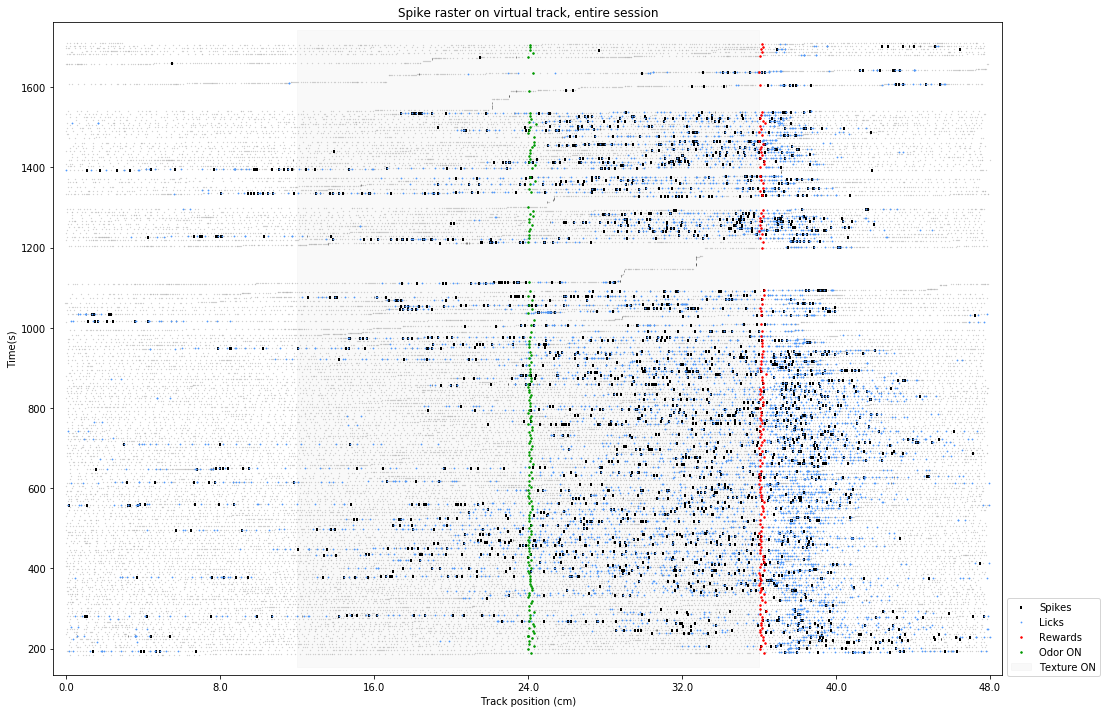

In [273]:
fig = plt.figure(figsize=[17,12])
ax = fig.add_subplot(111)
ax.plot(useP,useT,'.',color=[.7,.7,.7],markersize=.5)
ax.plot(spkPos,spkTime,'|',color=[.2,.2,.2], markersize=2, markeredgewidth=.5)
ax.plot(useSpkP,useSpkT,'|k', markersize=3, markeredgewidth=2, label='Spikes')
ax.fill_betweenx([min(md.Position.TS_PC)-30,max(md.Position.TS_PC)+30],[1920,1920],[1920*3,1920*3],color=[.8,.8,.8],alpha=0.1,label='Texture ON')
ax.set_xlabel('Track position (cm)')
ax.set_ylabel('Time(s)')
ax.set_title('Spike raster on virtual track, entire session')
ax.plot(licksPos,licksIDX,'.',color=[.3,.6,1],markersize = 1.5,label='Licks')
ax.plot(rewPos,rewIDX,'.',color=[1,0,0],markersize = 3,label='Rewards')
ax.plot(odorPos,odorIDX,'.',color=[0,.6,0],markersize = 3,label='Odor ON')
ax.set_ylim([min(md.Position.TS_PC)-50,max(md.Position.TS_PC)+50])
ax.set_xlim([min(md.Position.Value)-100,max(md.Position.Value)+100])
ax.set_xticks(np.arange(0,max(np.ceil(md.Position.Value))+1,max(np.ceil(md.Position.Value))/6))
ax.set_xticklabels(np.arange(0,max(np.ceil(md.Position.Value))+1,max(np.ceil(md.Position.Value))/6)/160)
ax.legend(loc='upper left', bbox_to_anchor=(1, 0.125))
plt.show()

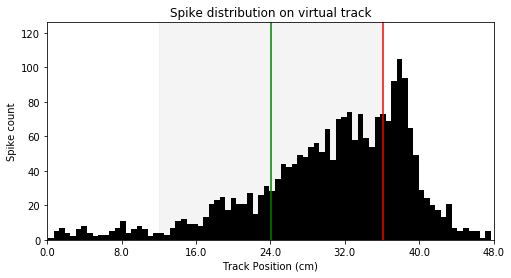

In [274]:
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111)
n, bins, patches = ax.hist(useSpkP[:],80,color=[0,0,0])
ax.fill_betweenx([0,max(n)*1.2],[1920,1920],[1920*3,1920*3],color=[.8,.8,.8],alpha=0.2)
ax.plot([np.mean(rewPos),np.mean(rewPos)],[0,max(n)*1.2],'r')
ax.plot([np.mean(odorPos),np.mean(odorPos)],[0,max(n)*1.2],color=[0,.5,0])
ax.set_ylabel('Spike count')
ax.set_xlabel('Track Position (cm)')
ax.set_title('Spike distribution on virtual track')
ax.set_xlim([0,max(md.Position.Value)])
ax.set_ylim([0, max(n)*1.2])
ax.set_xticks(np.arange(0,max(np.ceil(md.Position.Value))+1,max(np.ceil(md.Position.Value))/6))
ax.set_xticklabels(np.arange(0,max(np.ceil(md.Position.Value))+1,max(np.ceil(md.Position.Value))/6)/160)
plt.show()

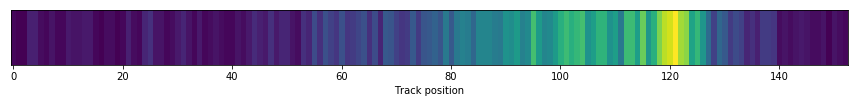

In [275]:

plt.figure(figsize=[15,1])
bins=np.arange(0,int(max(md.Position.Value)),50)
hist, edges = np.histogram(useSpkP, bins)
hist=hist[np.newaxis]
plt.imshow(hist, aspect = "auto", cmap="viridis")
plt.xlabel('Track position')
plt.gca().set_yticks([])
plt.show()

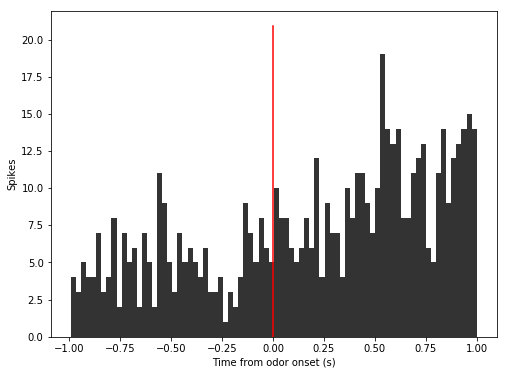

In [276]:
# Odor triggered PSTH
n = -1
spikes = []
for i in md.Odor.TS_PC:
    n = -1
    doit = True
    while doit and n < len(useSpkT)-1:
        n += 1
        if useSpkT[n]-i > 1:
            doit = False
        elif useSpkT[n]-i > -1:
            spikes.append(useSpkT[n]-i)

fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, patches = ax.hist(spikes,80,color=[.2,.2,.2])
ax.plot([0,0],[0,max(n)*1.1],'r')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Spikes')
plt.show()

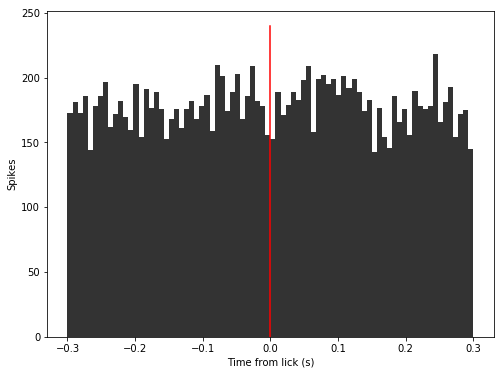

In [277]:
# Lick triggered PSTH
n = -1
spikes = []
for i in md.Licks.TS_PC:
    n = -1
    doit = True
    while doit and n < len(useSpkT)-1:
        n += 1
        if useSpkT[n]-i > .3:
            doit = False
        elif useSpkT[n]-i > -.3:
            spikes.append(useSpkT[n]-i)

fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, patches = ax.hist(spikes,80,color=[.2,.2,.2])
ax.plot([0,0],[0,max(n)*1.1],'r')
ax.set_xlabel('Time from lick (s)')
ax.set_ylabel('Spikes')
plt.show()

In [278]:
# Texture triggered PSTH

In [149]:
# Mutual information score on virtual track

---
---
---
---
---
# Summary stats
---
---
---
---
---
---


In [84]:
# Session time
max(md.Sniff.TS_PC)-min(md.Sniff.TS_PC)

# Number of trials
max(md.Trial.Value)

# Average and max speed
vel = [md.Position.Velocity[x] for x in md.Position.VelFilt]
np.mean(vel)
max(vel)

31.48611111125901

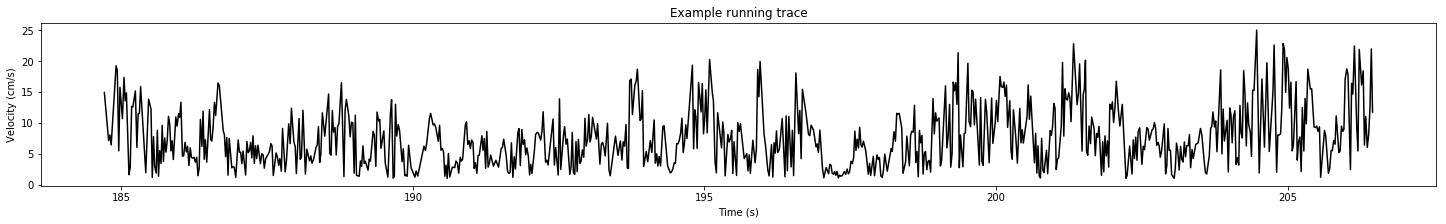

In [85]:
plt.figure(figsize=[25,3])
plt.plot(md.Position.TS_PC[0:1000],vel[0:1000],'k')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')
plt.title('Example running trace')
plt.show()

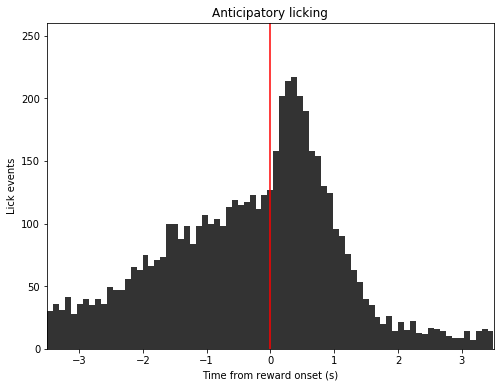

In [86]:
# Get licks triggered by rewards
n = -1
rewTrigLicks = []
for k in md.Reward.TS_PC:
    doit = True
    while (doit) and (n < (len(md.Licks.TS_PC)-1)):
        n += 1
        i = md.Licks.TS_PC[n]
        if abs(i-k) < 3.5:
            rewTrigLicks.append(i-k)
        if i-k > 3.5:
            doit = False

n, bins, patches = plt.hist(rewTrigLicks,75,color=[0.2,0.2,0.2])
plt.plot([0,0],[0,max(n)*1.2],'r')
plt.xlabel('Time from reward onset (s)')
plt.ylabel('Lick events')
plt.ylim([0, max(n)*1.2])
plt.xlim([-3.5, 3.5])
plt.title('Anticipatory licking')
plt.show()

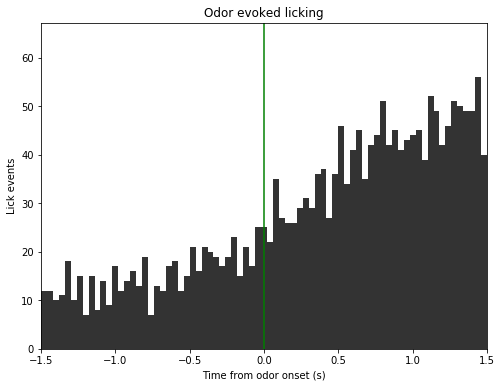

In [87]:
# Get licks triggered by odors
n = -1
odorTrigLicks = []
for k in md.Odor.TS_PC:
    doit = True
    while (doit) and (n < (len(md.Licks.TS_PC)-1)):
        n += 1
        i = md.Licks.TS_PC[n]
        if abs(i-k) < 1.5:
            odorTrigLicks.append(i-k)
        if i-k > 1.5:
            doit = False

n, bins, patches = plt.hist(odorTrigLicks,75,color=[0.2,0.2,0.2])
plt.plot([0,0],[0,max(n)*1.2],'g')
plt.xlabel('Time from odor onset (s)')
plt.ylabel('Lick events')
plt.ylim([0, max(n)*1.2])
plt.xlim([-1.5, 1.5])
plt.title('Odor evoked licking')
plt.show()

In [88]:
# Get velocity changes triggered by rewards
n = -1
velIDX = []
velVal = []
velRew = []
rewn = -1
for k in md.Reward.TS_PC:
    doit = True
    rewn += 1
    while (doit) and (n < (len(md.Position.TS_PC)-1)):
        n += 1
        i = md.Position.TS_PC[n]
        if abs(i-k) < 1.5 and md.Position.Velocity[n] > velT:
            velIDX.append(i-k)
            velVal.append(md.Position.Velocity[n])
            velRew.append(rewn)
        if i-k > 1.5:
            doit = False

velIDX = [int(x*100) for x in velIDX]

velMm = np.zeros([max(velRew)+1,299])
for i,j in enumerate(velRew):
    velMm[j,velIDX[i]+149] = velVal[i]

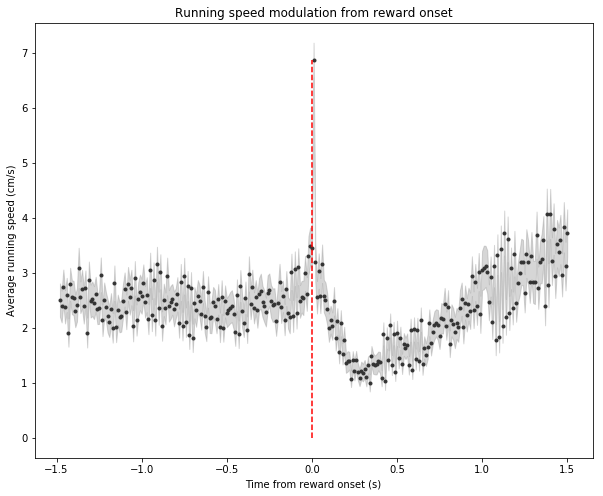

In [89]:
plt.figure(figsize=[10,8])
plt.plot(np.arange(-1.48,1.51,.01),np.mean(velMm,axis=0),'.',color=[.2,.2,.2],linewidth=1)
plt.plot([0,0],[0,max(np.mean(velMm,axis=0))],'--r',linewidth=1.5)
plt.fill_between(np.arange(-1.48,1.51,.01),np.mean(velMm,axis=0)+np.std(velMm,axis=0)/np.sqrt(max(velRew)),np.mean(velMm,axis=0)-np.std(velMm,axis=0)/np.sqrt(max(velRew)), alpha=.4, color=[0.6,.6,.6])
plt.xlabel('Time from reward onset (s)')
plt.ylabel('Average running speed (cm/s)')
plt.title('Running speed modulation from reward onset')
plt.show()

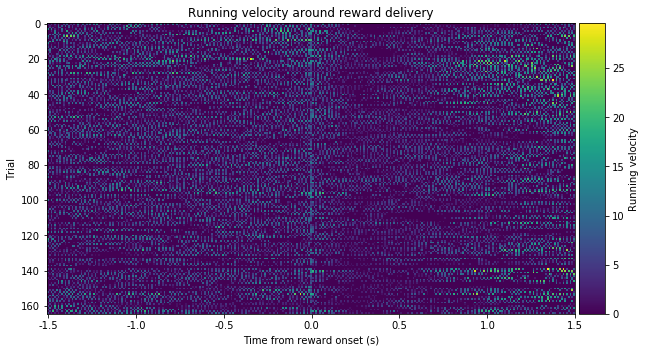

In [90]:
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
im = ax.imshow(velMm)
ax.set_xlabel('Time from reward onset (s)')
ax.set_ylabel('Trial')
ax.set_title('Running velocity around reward delivery')
ax.set_xticks(np.arange(0,velMm.shape[1]+1,velMm.shape[1]/6))
ax.set_xticklabels(np.arange(-1.5,1.5+1,.5))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical',label='Running velocity')
plt.show()

In [91]:
# Get velocity changes triggered by odors
n = -1
velOIDX = []
velOVal = []
velORew = []
rewn = -1
for k in md.Odor.TS_PC:
    doit = True
    rewn += 1
    while (doit) and (n < (len(md.Position.TS_PC)-1)):
        n += 1
        i = md.Position.TS_PC[n]
        if abs(i-k) < 1.5 and md.Position.Velocity[n] > velT:
            velOIDX.append(int((i-k)*100))
            velOVal.append(md.Position.Velocity[n])
            velORew.append(rewn)
        if i-k > 1.5:
            doit = False
        
velOMm = np.zeros([max(velORew)+1,299])

for i,j in enumerate(velORew):
    velOMm[j,velOIDX[i]+149] = velOVal[i]

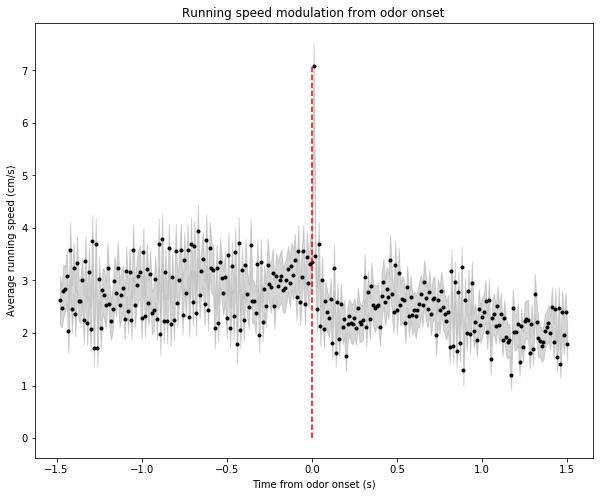

In [19]:
plt.figure(figsize=[10,8])
plt.fill_between(np.arange(-1.48,1.51,.01),np.mean(velOMm,axis=0)+np.std(velOMm,axis=0)/np.sqrt(max(velORew)),np.mean(velOMm,axis=0)-np.std(velOMm,axis=0)/np.sqrt(max(velORew)), alpha=.4, color=[0.6,.6,.6])
plt.plot(np.arange(-1.48,1.51,.01),np.mean(velOMm,axis=0),'.',color=[0,0,0],linewidth=1)
plt.plot([0,0],[0,max(np.mean(velOMm,axis=0))],'--r',linewidth=1.5)
plt.xlabel('Time from odor onset (s)')
plt.ylabel('Average running speed (cm/s)')
plt.title('Running speed modulation from odor onset')
plt.show()

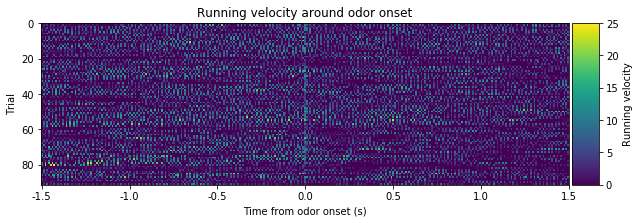

In [20]:
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
im = ax.imshow(velOMm)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Trial')
ax.set_title('Running velocity around odor onset')
ax.set_xticks(np.arange(0,velOMm.shape[1]+1,velOMm.shape[1]/6))
ax.set_xticklabels(np.arange(-1.5,1.5+1,.5))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical',label='Running velocity')
plt.show()


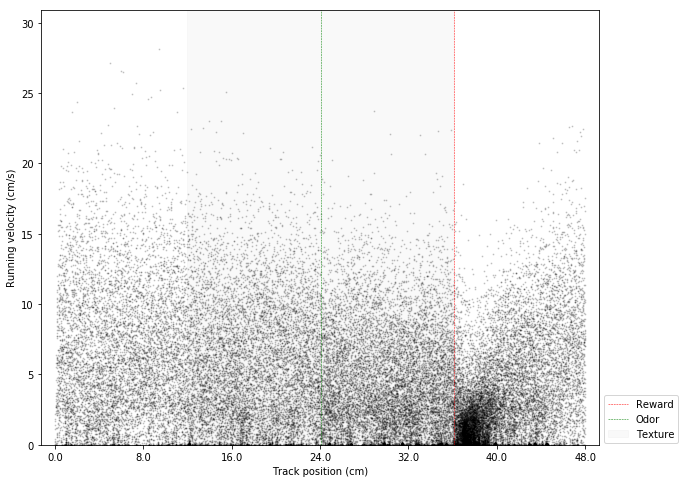

In [21]:
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
ax.plot(md.Position.Value[1:],md.Position.Velocity,'.k',markersize=2,alpha=.15)
#plt.plot([0,0],[0,20],'k',[max(md.Position.Value),max(md.Position.Value)],[0,20],'k')
ax.fill_betweenx([0,max(md.Position.Velocity)*1.1],[1920,1920],[1920*3,1920*3],color=[.8,.8,.8],alpha=0.1,label='Texture')
ax.plot([np.mean(rewPos),np.mean(rewPos)],[0,max(md.Position.Velocity)*1.1],'--r',linewidth=.5,label='Reward')
ax.plot([np.mean(odorPos),np.mean(odorPos)],[0,max(md.Position.Velocity)*1.1],'--',color=[0,.5,0],linewidth=.5,label='Odor')
ax.set_ylim([0,max(md.Position.Velocity)*1.1])
ax.set_xlabel('Track position (cm)')
ax.set_ylabel('Running velocity (cm/s)')
ax.set_xlim([min(md.Position.Value)-200,max(md.Position.Value)+200])
ax.set_xticks(np.arange(0,max(np.ceil(md.Position.Value))+1,max(np.ceil(md.Position.Value))/6))
ax.set_xticklabels(np.arange(0,max(np.ceil(md.Position.Value))+1,max(np.ceil(md.Position.Value))/6)/160)
ax.legend(bbox_to_anchor=(1, 0.125))
plt.show()

In [22]:
# Get speed changes at texture onset
texTS_PC = []
n = -1
for i in md.Trial.TS_PC[2:]:
    doit = True
    while doit and (n < len(md.Position.Value)-1):
        n += 1
        while (md.Position.TS_PC[n] < i or md.Position.Value[n] < 1920) and (n < len(md.Position.Value)-1):
            n += 1
        texTS_PC.append(md.Position.TS_PC[n])
        doit = False

# Get velocity changes triggered by texture onset
n = -1
velTIDX = []
velTVal = []
velTRew = []
rewn = -1

for k in texTS_PC:
    doit = True
    rewn += 1
    while (doit) and (n < (len(md.Position.TS_PC)-2)):
        n += 1
        i = md.Position.TS_PC[n]
        if abs(i-k) < 1.5 and md.Position.Velocity[n] > velT:
            velTIDX.append(int((i-k)*100))
            velTVal.append(md.Position.Velocity[n])
            velTRew.append(rewn)
        if i-k > 1.5:
            doit = False
        
velTMm = np.zeros([max(velTRew)+1,299])

for i,j in enumerate(velTRew):
    velTMm[j,velTIDX[i]+149] = velTVal[i]

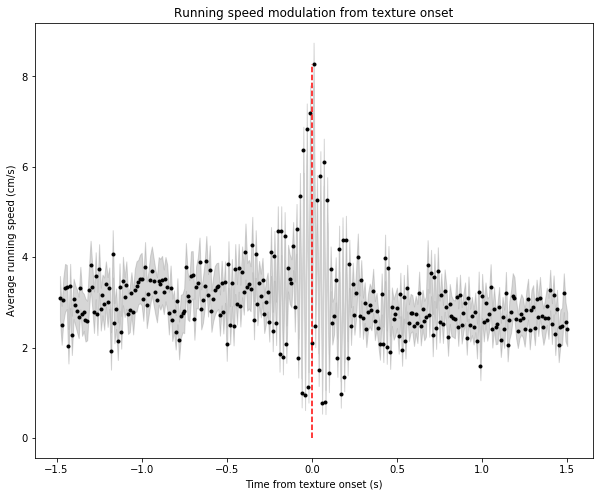

In [23]:
plt.figure(figsize=[10,8])
plt.fill_between(np.arange(-1.48,1.51,.01),np.mean(velTMm,axis=0)+np.std(velTMm,axis=0)/np.sqrt(max(velTRew)),np.mean(velTMm,axis=0)-np.std(velTMm,axis=0)/np.sqrt(max(velTRew)), alpha=.4, color=[0.6,.6,.6])
plt.plot(np.arange(-1.48,1.51,.01),np.mean(velTMm,axis=0),'.',color=[0,0,0],linewidth=1)
plt.plot([0,0],[0,max(np.mean(velTMm,axis=0))],'--r',linewidth=1.5)
plt.xlabel('Time from texture onset (s)')
plt.ylabel('Average running speed (cm/s)')
plt.title('Running speed modulation from texture onset')
plt.show()

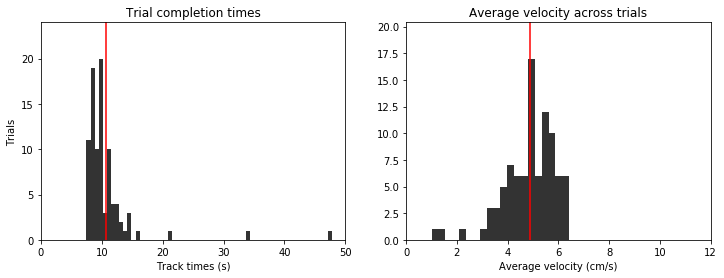

In [63]:
fig = plt.figure(figsize=[12,4])
ax = fig.add_subplot(121)
n, bins, patches = ax.hist(np.diff(md.Trial.TS_PC[2:]),60,color=[.2,.2,.2])
ax.plot([np.mean(np.diff(md.Trial.TS_PC[2:])),np.mean(np.diff(md.Trial.TS_PC[2:]))],[0,max(n)*1.2],'r')
ax.set_xlim([0,50])#max(np.diff(md.Trial.TS_PC[2:]))*1.2])
ax.set_xlabel('Track times (s)')
ax.set_ylabel('Trials')
ax.set_ylim([0,max(n)*1.2])
ax.set_title('Trial completion times')

ax2 = fig.add_subplot(122)
n2, bins2, patches2 = ax2.hist(48/np.diff(md.Trial.TS_PC[2:]),20,color=[.2,.2,.2])
ax2.plot([np.mean(48/np.diff(md.Trial.TS_PC[2:])),np.mean(48/np.diff(md.Trial.TS_PC[2:]))],[0,max(n2)*1.2],'r')
ax2.set_xlim([0,12])#max(np.diff(md.Trial.TS_PC[2:]))*1.2])
ax2.set_xlabel('Average velocity (cm/s)')
ax2.set_ylim([0,max(n2)*1.2])
ax2.set_title('Average velocity across trials')

plt.show()

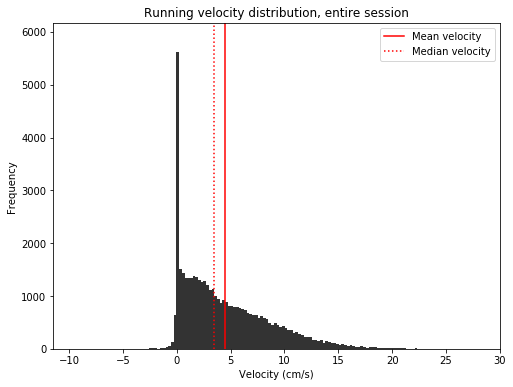

In [25]:
# Velocity distribution for whole recording
tmp = [x for x in md.Position.Velocity if x > -10]
fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(111)
n, bins, patches = ax.hist(tmp,150,color=[.2,.2,.2])
plt.plot([np.mean(tmp),np.mean(tmp)],[0,max(n)*1.1],'r',label='Mean velocity')
plt.plot([np.median(tmp),np.median(tmp)],[0,max(n)*1.1],':r',label='Median velocity')
ax.set_xlabel('Velocity (cm/s)')
ax.set_ylabel('Frequency')
ax.set_ylim([0,max(n)*1.1])
ax.set_title('Running velocity distribution, entire session')
ax.legend()
plt.show()

In [26]:
# Pull out velocity/lick modulation by individual odors

In [104]:
# Spatial/ mutual information
print(max(md.Trial.Value)*48,(max(md.Position.TS_PC)-min(md.Position.TS_PC))/60,max(md.Trial.Value))

4464.0 16.44381666666667 93.0


In [28]:
# Find trial assignment for each value
posTrial = []
posVel = []
pos = []
n = -1
for idx,trial in enumerate(md.Trial.TS_PC):
    doit = True
    while doit and n < len(md.Position.TS_PC):
        n += 1
        if md.Position.TS_PC[n] > trial and idx == len(md.Trial.TS_PC)-1 and md.Position.Velocity[n] > -100:
            posTrial.append(md.Trial.Value[idx])
            posVel.append(md.Position.Velocity[n])
            pos.append(int(md.Position.Value[n]/160))
            break
        elif md.Position.TS_PC[n] > trial and md.Position.TS_PC[n] < md.Trial.TS_PC[idx+1] and md.Position.Velocity[n] > -100:
            posTrial.append(md.Trial.Value[idx])
            posVel.append(md.Position.Velocity[n])
            pos.append(int(md.Position.Value[n]/160))
        elif md.Position.TS_PC[n] >= md.Trial.TS_PC[idx+1]:
            doit = False


In [29]:
posM = np.zeros([int(max(posTrial)),max(pos)+1])
timeM = np.zeros([int(max(posTrial)),max(pos)+1])
for i,j in enumerate(pos):
    posM[int(posTrial[i]-1),j] += posVel[i]
    timeM[int(posTrial[i]-1),j] += 1
    

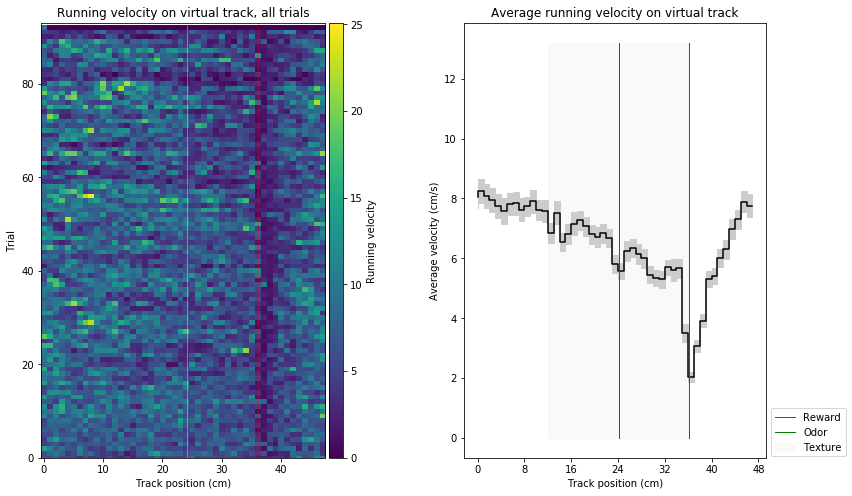

In [30]:
fig = plt.figure(figsize=[13,8])
ax = fig.add_subplot(122)
ax.step(range(48),np.mean(posM/(timeM+.1),axis=0),'k')
ax.fill_between(range(48),np.mean(posM/(timeM+.1),axis=0)-np.std(posM/(timeM+.1),axis=0)/np.sqrt(max(posTrial)),np.mean(posM/(timeM+.1),axis=0)+np.std(posM/(timeM+.1),axis=0)/np.sqrt(max(posTrial)),step='pre',color=[0.8,0.8,0.8])
ax.plot([np.mean(rewPos)/160,np.mean(rewPos)/160],[0,12*1.1],'r',linewidth=1,label='Reward')
ax.plot([np.mean(odorPos)/160,np.mean(odorPos)/160],[0,12*1.1],color=[0,.5,0],linewidth=1,label='Odor')
ax.set_xticks(np.arange(0,49,8))
ax.set_xlabel('Track position (cm)')
ax.set_ylabel('Average velocity (cm/s)')
ax.set_title('Average running velocity on virtual track')
ax.fill_betweenx([0,12*1.1],[1920/160,1920/160],[1920*3/160,1920*3/160],color=[.8,.8,.8],alpha=0.1,label='Texture')
ax.legend(bbox_to_anchor=(1, 0.125))

ax = fig.add_subplot(121)
plt.imshow(posM/(timeM+.1),aspect='auto')
ax.plot([np.mean(rewPos)/160,np.mean(rewPos)/160],[0,max(posTrial)],'r',linewidth=.6,alpha=.6,label='Reward')
ax.plot([np.mean(odorPos)/160,np.mean(odorPos)/160],[0,max(posTrial)],color=[1,1,1],linewidth=.6,alpha=.6,label='Odor')
ax.set_xlabel('Track position (cm)')
ax.set_ylabel('Trial')
ax.set_ylim([0,max(posTrial)])
ax.set_title('Running velocity on virtual track, all trials')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical',label='Running velocity')
fig.subplots_adjust(wspace=.4)
plt.show()

In [31]:
# Get trial number for each odor presentation
odorTIDX = []
odors = []
for j,odor in enumerate(md.Odor.TS_PC):
    ttt = [i for i,x in enumerate(md.Trial.TS_PC) if x-odor > 0]
    odorTIDX.append(ttt[0])
    odors.append(md.Odor.Value[j])

In [32]:
noodor = [odorTIDX[idx] for idx,h in enumerate(odors) if h == 1]
odor2 = [odorTIDX[idx] for idx,h in enumerate(odors) if h == 2]
odor3 = [odorTIDX[idx] for idx,h in enumerate(odors) if h == 3]
odor4 = [odorTIDX[idx] for idx,h in enumerate(odors) if h == 4]

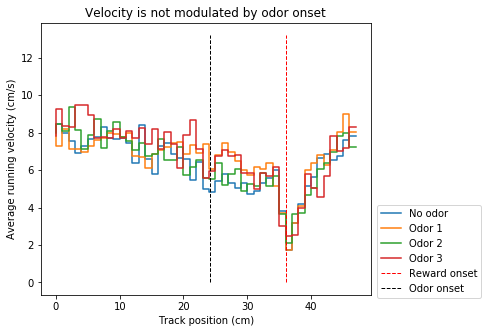

In [33]:
fig = plt.figure(figsize=[13,5])
ax = fig.add_subplot(122)
ax.step(range(48),np.mean(posM[noodor,:]/(timeM[noodor,:]+.1),axis=0),label='No odor')
ax.step(range(48),np.mean(posM[odor2,:]/(timeM[odor2,:]+.1),axis=0),label='Odor 1')
ax.step(range(48),np.mean(posM[odor3[:-1],:]/(timeM[odor3[:-1],:]+.1),axis=0),label='Odor 2')
ax.step(range(48),np.mean(posM[odor4[:-1],:]/(timeM[odor4[:-1],:]+.1),axis=0),label='Odor 3')
ax.plot([np.mean(rewPos)/160,np.mean(rewPos)/160],[0,12*1.1],'--r',linewidth=1,label='Reward onset')
ax.plot([np.mean(odorPos)/160,np.mean(odorPos)/160],[0,12*1.1],'--',color=[0,0,0],linewidth=1,label='Odor onset')
ax.set_xlabel('Track position (cm)')
ax.set_ylabel('Average running velocity (cm/s)')
ax.set_title('Velocity is not modulated by odor onset')
ax.legend(bbox_to_anchor=(1.35, 0.35))
plt.show()

In [381]:
# Lick autocorrelogram
n = -1
for i in md.Odor.TS_PC:
    n += 1
    